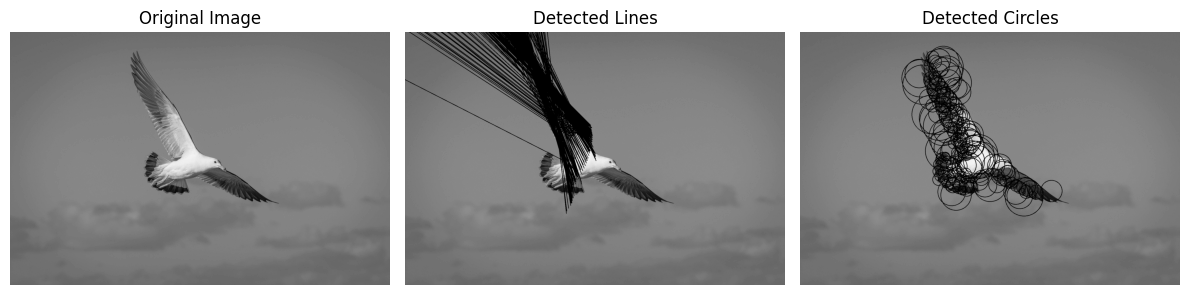

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'bird.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Perform Hough Line Transform
lines = cv2.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=100)

# Perform Hough Circle Transform
circles = cv2.HoughCircles(
    blurred_image,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50,
    param2=30,
    minRadius=5,
    maxRadius=100
)

# Draw detected lines on the original image
lines_image = image.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Draw detected circles on the original image
circles_image = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(circles_image, center, radius, (0, 255, 0), 2)

# Display the original image and images with detected lines and circles
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(lines_image, cmap='gray')
plt.title('Detected Lines')
plt.axis('off')

plt.subplot(133)
plt.imshow(circles_image, cmap='gray')
plt.title('Detected Circles')
plt.axis('off')

plt.tight_layout()
plt.show()
